In [1]:
using Pkg

In [11]:
Pkg.activate("/Users/navaro/JuliaProjects/HOODESolver.jl/")

 Activating environment at `~/JuliaProjects/HOODESolver.jl/Project.toml`


In [12]:
using DiffEqOperators
using DifferentialEquations
using HOODESolver
using Plots

In [13]:
epsilon = 0.002
A = [ 0 0 1 0 ;
      0 0 0 0 ;
     -1 0 0 0 ;
      0 0 0 0 ]

f1 = DiffEqArrayOperator( A ./ epsilon)

function f2(du, u, p, t)
    du[1] = 0
    du[2] = u[4]
    du[3] = 2*u[1]*u[2]
    du[4] = -u[2] - u[1]^2 + u[2]^2 
end

tspan = (0.0, 0.1)

u0 = [0.55, 0.12, 0.03, 0.89]

4-element Array{Float64,1}:
 0.55
 0.12
 0.03
 0.89

In [14]:
f1bis = LinearHOODEOperator( epsilon, A)

LinearHOODEOperator{Float64}(0.002, [0 0 1 0; 0 0 0 0; -1 0 0 0; 0 0 0 0])

In [15]:
prob3 = SplitODEProblem( f1bis, f2, u0, tspan)
sol3 = solve( prob3, HOODEAB())

solve function prob=HOODEProblem with uType Array{Float64,1} and tType Float64. In-place: nothing
timespan: (0.0, 0.1)
u0: [0.55, 0.12, 0.03, 0.89],
 nb_tau=32, order=4, order_prep=6, dense=true,
 nb_t=100, getprecision=true, verbose=100

x 100/100

x 114/114


retcode: Success
Interpolation: Unknown
t: 101-element Array{Float64,1}:
 0.0
 0.001
 0.002
 0.0030000000000000005
 0.004
 0.005
 0.006000000000000001
 0.007000000000000001
 0.008
 0.009000000000000001
 0.01
 0.011000000000000001
 0.012000000000000002
 ⋮
 0.08900000000000001
 0.09
 0.091
 0.09200000000000001
 0.09300000000000001
 0.094
 0.095
 0.09600000000000002
 0.09700000000000002
 0.098
 0.099
 0.1
u: 101-element Array{Array{Float64,1},1}:
 [0.55, 0.12, 0.03, 0.89]
 [0.4970851888100157, 0.12088979929630853, -0.23723317827669568, 0.8896078720151698]
 [0.32252419015827366, 0.12177925290918891, -0.44641008780134694, 0.8893234937069813]
 [0.06903565000894342, 0.12266849170998982, -0.5463418389688205, 0.8891708208750501]
 [-0.20134714433193165, 0.12355760628605567, -0.5125742027100955, 0.8890521553491825]
 [-0.4224570270647339, 0.12444656307467446, -0.3533715807219147, 0.8888379299678651]
 [-0.5401851319054346, 0.12533523459048201, -0.10769412784122748, 0.8884857798636859]
 [-0.52572200

solve function prob=HOODEProblem with uType Array{Float64,1} and tType Float64. In-place: nothing
timespan: (0.0, 0.1)
u0: [0.55, 0.12, 0.03, 0.89],
 nb_tau=32, order=4, order_prep=6, dense=true,
 nb_t=100, getprecision=true, verbose=100

x 100/100

x 114/114


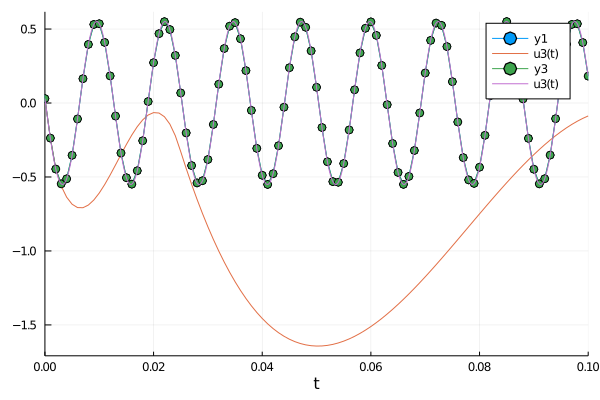

In [16]:
prob1 = SplitODEProblem(f1, f2, u0, tspan);
sol1 = solve(prob1, KenCarp4(), saveat=(0:0.001:0.1));
prob2 = HOODEProblem(f2, u0, tspan, nothing, A, epsilon);
sol2 = solve(prob2, nb_t=100);

t = LinRange(tspan[1], tspan[2], length(sol2))
plot(t, getindex.(sol2.u,3), m=:o)
plot!(sol1, vars=[3])
plot!(t, getindex.(sol3.u,3), m=:o)
plot!(sol3, vars=[3])

In [17]:
sol2.u - sol1.u

101-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0]
 [0.0009716923068936456, 3.6805324760136315e-9, -0.000981106094405021, -6.361618472894293e-6]
 [-0.00011256429327977102, 3.3887106315466653e-9, -0.0006523657804801131, -2.6902593486255455e-6]
 [-0.015733820936206608, 4.323021236818381e-8, 0.015032257346644928, 1.4701584355014674e-5]
 [-0.0914042366996945, 3.2758533256849187e-7, 0.12402794476925105, 5.263726707482874e-5]
 [-0.16949697416645232, 8.260023831724306e-7, 0.3307420079084062, -2.010469904778489e-6]
 [-0.1910046461916422, 1.3903554089700343e-6, 0.599146771505356, -0.0001918045180459016]
 [-0.12221927662410348, 1.895137572621719e-6, 0.872053338707641, -0.0004331718672070384]
 [0.0382178871789946, 2.3332177468693427e-6, 1.0858243919250898, -0.0005933857936415432]
 [0.2601829345876208, 2.8028144524738785e-6, 1.1866647481232797, -0.0006127183071393816]
 [0.49064003031244524, 3.3976584194739257e-6, 1.1445031465272777, -0.0005595082906596494]
 [0.6678188420862612, 4.1012812

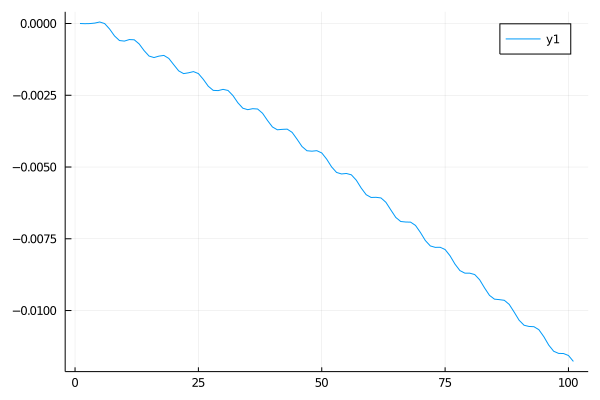

In [18]:
plot( getindex.(sol2.u - sol1.u, 4))

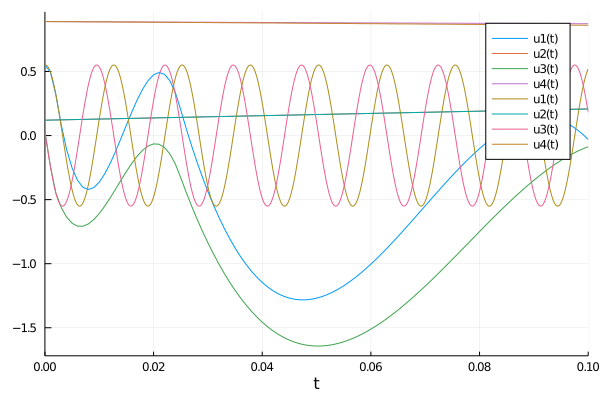

In [19]:
plot(sol1)
plot!(sol3)